In [513]:
# Supress Warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [514]:
bike = pd.read_csv("D:\Learning\AI_ML\Bike Sharing Assignments\day.csv")

In [515]:
# checking the first 5 rows of the bike sharing data
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [516]:
# getting the basic info of the bike data

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [517]:
# getting the description
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [518]:
# checking the shape of the bike data
bike.shape

(730, 16)


#### Dataset has 730 rows and 16 columns. All the columns are numerical and categorical except the date Column of "dteday"


### Performing the Data Quality Checks

## Check for NULL/MISSING values

In [519]:
bike.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

Found no Missing values in the bike data

In [520]:
bike_duplicated = bike[bike.duplicated()]
print(bike_duplicated)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


As we see, There is no duplicated data in the above result

## Cleaning the Data

In [521]:
bike.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        3        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        5        1           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        6        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        0        0           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
                                                                                             

From the above analysis , it is clear that the four columns (instant,dteday , casual & registered) are irrelevant or redundant for the data analysis
Because instant column has only the index value, dteday column the date value and it is not that essential and then the columns like casual and registered has 'count' values that is based on the category which is also not relevant.

So, dropping the above columns can help in deriving the better results.

In [522]:
# To keep the record safe, We are not dropping the record but instead we are making a copy of it.

#bike_del = bike[['instant','dteday','casual','registered']]
bike_del = bike.loc[:, ~bike.columns.isin(['instant','dteday','casual','registered'])]
bike_del.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [523]:
bike_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [524]:
# dataType of the dataframe

bike_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [525]:
bike_del.season.head()

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64

In [526]:
# converting the datatype from int to category

bike_del['season']=bike_del['season'].astype('category')
bike_del['weathersit']=bike_del['weathersit'].astype('category')
bike_del['mnth']=bike_del['mnth'].astype('category')
bike_del['weekday']=bike_del['weekday'].astype('category')

In [527]:
bike_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [528]:
bike_del.season.head()

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [529]:
bike_del.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [530]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_del = pd.get_dummies(bike_del, drop_first=True)
bike_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [531]:
print(bike_del.shape)
bike_del.head()

(730, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Segregating the data to Train and test. So, importing the train_test_split from sklearn.

The Data will be splitted into 7:3 ratio, i.e., 70% of the data will be the train data and 30% of the data will be the test data.

The shape of the dataframe is 730,16 before splitting the data. And the data is shown as below.

In [532]:
bike_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [533]:
from sklearn.model_selection import train_test_split
np.random.seed(0) # setting the random set 0 to make sure to retain the same data all the time.
# Also making sure to set the random_state to fix the random data. So that, the data remains same all the time we run it.
X_train,X_test = train_test_split(bike_del,train_size=0.7,test_size=0.3,random_state=350)

In [534]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 229 to 638
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [535]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 256 to 461
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

In [536]:
print(X_train.shape)
print(X_test.shape)

(510, 30)
(219, 30)


After train_test_split the X_train data has got the shape of (510,30) and X_test has got the shape of (219,30)

## Performing the EDA on the data

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

In [537]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [538]:
bike_del.dtypes

yr                int64
holiday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
cnt               int64
season_2          uint8
season_3          uint8
season_4          uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
weathersit_2      uint8
weathersit_3      uint8
dtype: object

In [539]:
print(bike_del.columns[(bike_del.dtypes=='int64')])
print(bike_del.columns[bike_del.dtypes=='float64'])

Index(['yr', 'holiday', 'workingday', 'cnt'], dtype='object')
Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object')


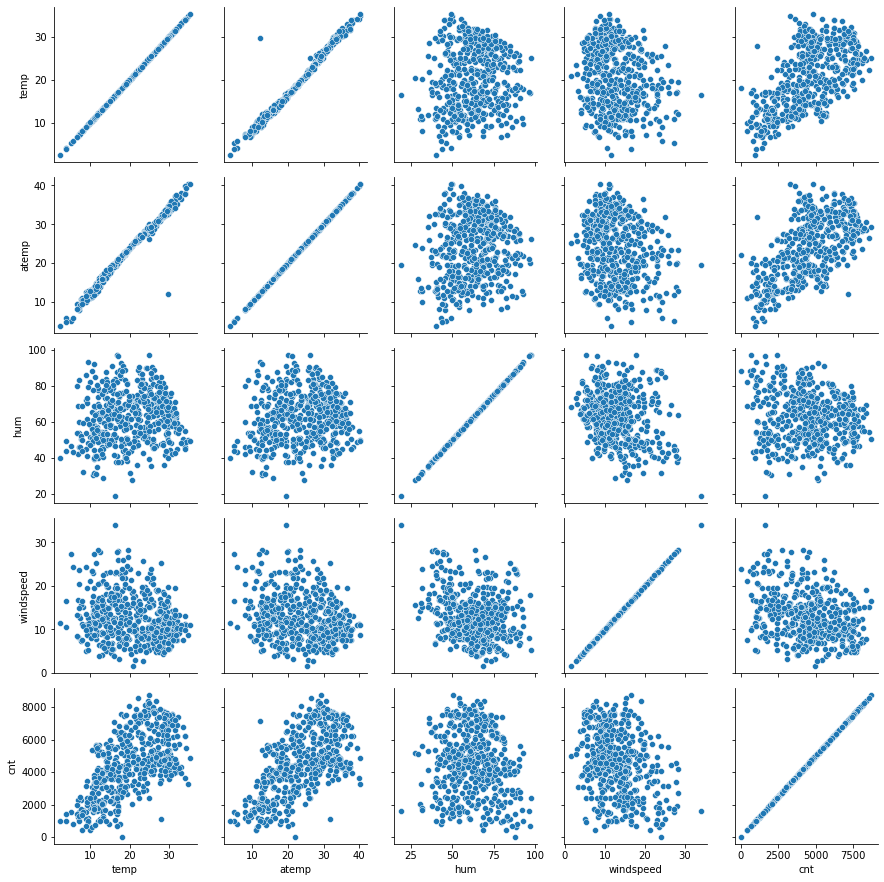

In [540]:

# considering only the numeric columns for the analysis.

bike_n =X_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
g = sns.PairGrid(bike_n)
g.map(sns.scatterplot)
plt.show()

From the PairGrid , We are able to see the temp, atemp and cnt are having the LinearRegression

## Analysis on the categorical variables

In [541]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 229 to 638
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

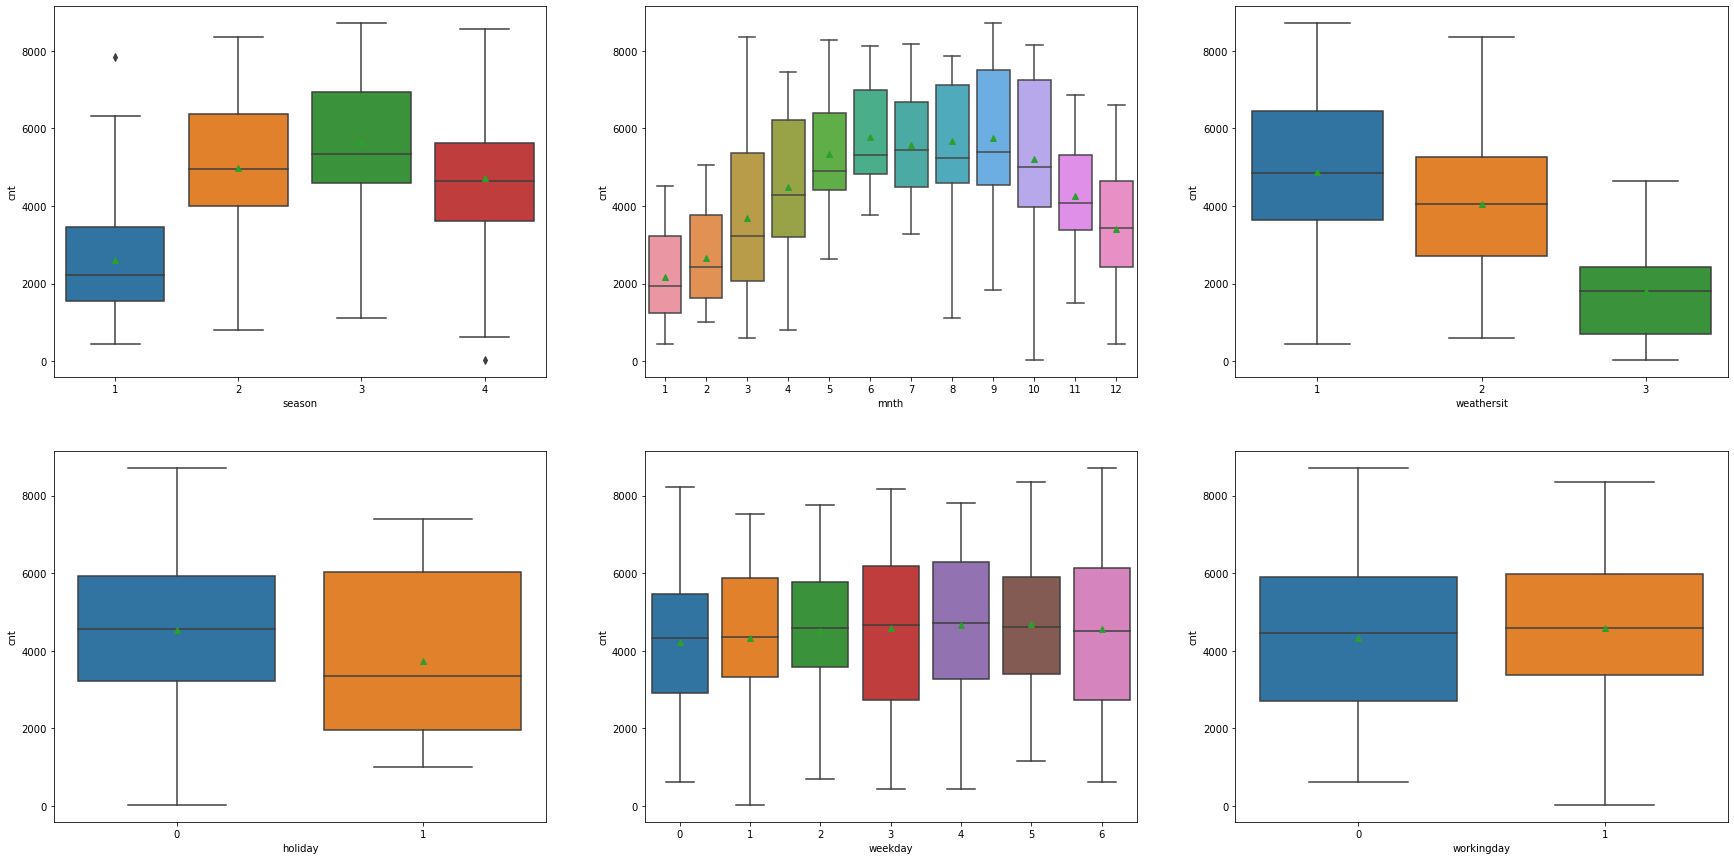

In [542]:
## Building the boxplots for the categorical variables to see how the predictor variables are affecting the dependent variable 'cnt'


plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike,showmeans=True)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike, showmeans=True)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike, showmeans = True)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike, showmeans = True)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike, showmeans = True)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike, showmeans = True)
plt.show()

### We are going to take the median value of the booking count and check which season has the most count which is lying above average

In [543]:
avg_booking = bike['cnt'].median()
(bike.season[bike['cnt']>avg_booking].value_counts()/len(bike)*100).mode().nlargest(3)

3    19.589041
2    15.479452
1    12.739726
dtype: float64

**Season 3** has the most bookings followed by season 2 and 1

In [544]:
bike.mnth[bike['cnt']>avg_booking].value_counts()/len(bike)*100

6     6.986301
8     6.575342
7     6.164384
9     6.027397
5     5.890411
10    5.342466
4     3.835616
11    3.287671
3     3.150685
12    2.328767
2     0.410959
Name: mnth, dtype: float64

**month** 5,6,7,8,9 has more number of Bookings

In [545]:
weathersit_bookings = bike.weathersit[bike['cnt']>avg_booking].value_counts()/len(bike)*100
total = sum(bike.weathersit[bike['cnt']>avg_booking].value_counts()/len(bike)*100)
print(weathersit_bookings/total*100)

1    73.972603
2    25.753425
3     0.273973
Name: weathersit, dtype: float64


**Weather** sit 1 has the most counts i.e, (74 percent)followed by 2 and 3

In [546]:
holiday_bookings = bike.holiday[bike['cnt']>avg_booking].value_counts()/len(bike)*100
total = sum(bike.holiday[bike['cnt']>avg_booking].value_counts()/len(bike)*100)
print(holiday_bookings/total*100)

0    97.808219
1     2.191781
Name: holiday, dtype: float64


Non Holidays has the most bookings (98%) and it looks unreal

In [547]:
Weekday_bookings = bike.weekday[bike['cnt']>avg_booking].value_counts()/len(bike)*100
total = sum(bike.weekday[bike['cnt']>avg_booking].value_counts()/len(bike)*100)
print(Weekday_bookings/total*100)

4    15.342466
5    15.068493
3    14.794521
2    14.520548
6    14.246575
0    13.424658
1    12.602740
Name: weekday, dtype: float64


- **Weekday** doesn't show much differences, as all of them lies between 12% to 15%

In [548]:
workingday_bookings = bike.workingday[bike['cnt']>avg_booking].value_counts()/len(bike)*100
total = sum(bike.workingday[bike['cnt']>avg_booking].value_counts()/len(bike)*100)
print(workingday_bookings/total*100)

1    70.136986
0    29.863014
Name: workingday, dtype: float64


Around 70% of the bookings were observed in the **Workingday**. So, It can be a significant variable.

# Finding the correlation

In [549]:
bike_del.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [550]:
bike.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


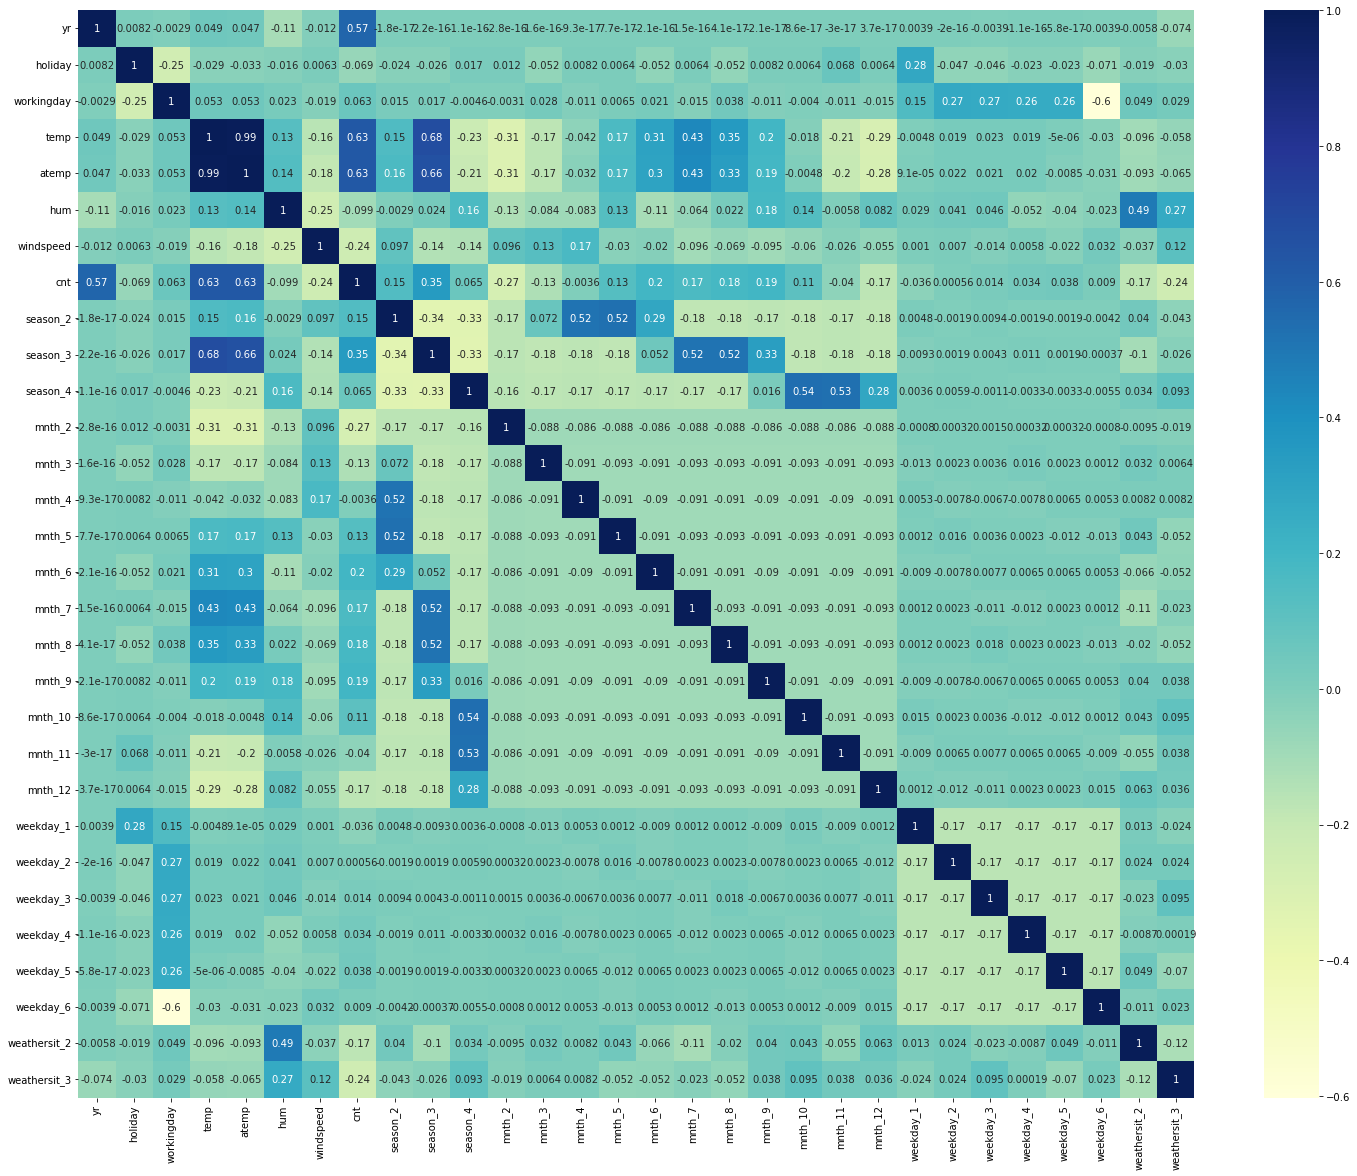

In [551]:
# Checking the correlation coefficients to analyse the data with the variables which are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(bike_del.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [552]:
from sklearn.preprocessing import MinMaxScaler

In [553]:
scaler = MinMaxScaler()

In [554]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
229,0,0,1,29.178347,33.1129,65.4583,15.624936,3805,0,1,...,0,0,0,0,0,1,0,0,0,0
86,0,0,1,10.838268,12.8787,30.2174,14.217668,2028,1,0,...,0,0,1,0,0,0,0,0,0,0
465,1,0,1,14.296536,16.8637,46.9565,19.783358,4862,1,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,30.271653,33.3654,44.4583,7.709154,5119,0,1,...,0,0,0,0,0,0,0,1,0,0
341,0,0,1,10.899153,12.8469,58.0000,16.083886,3322,0,0,...,0,1,0,0,0,1,0,0,0,0


In [555]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [556]:
# Apply scaler() to all the numeric variables

numerical = ['temp', 'atemp', 'hum', 'windspeed','cnt']

X_train[numerical] = scaler.fit_transform(X_train[numerical])

In [557]:
# Checking values after scaling
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
229,0,0,1,0.813093,0.803463,0.594795,0.434609,0.435228,0,1,...,0,0,0,0,0,1,0,0,0,0
86,0,0,1,0.255711,0.245927,0.145628,0.391308,0.230787,1,0,...,0,0,1,0,0,0,0,0,0,0
465,1,0,1,0.360813,0.355730,0.358978,0.562561,0.556834,1,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.846320,0.810421,0.327137,0.191045,0.586401,0,1,...,0,0,0,0,0,0,0,1,0,0
341,0,0,1,0.257562,0.245051,0.499734,0.448731,0.379659,0,0,...,0,1,0,0,0,1,0,0,0,0


## Linear Model

## Dividing into X and Y sets for the model building

In [558]:
y_train = X_train.pop('cnt')
x_train = X_train

Using Recursive Feature Elimination to remove the least significant variables and also to keep only the most important variables based on the rank, support.

In [559]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [560]:
# Running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(x_train,y_train)

rfe = RFE(lr, 16)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [561]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 12),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', False, 5),
 ('mnth_5', False, 2),
 ('mnth_6', False, 3),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 6),
 ('weekday_2', False, 14),
 ('weekday_3', False, 11),
 ('weekday_4', False, 7),
 ('weekday_5', False, 8),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [562]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_8', 'mnth_9', 'mnth_10',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [563]:
x_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5'],
      dtype='object')

In [564]:
# Creating test dataframe with RFE selected variables
x_train_rfe = x_train[col]

## Data Analysis with Stats Model

Analysing the Data with **Stats Model**. Here we calculate the VIF for Mulicollinearity. And Based on the **VIF, R-squared,adjusted R-squared and F-stastics** We drop the least important variable which can cause the discrepancies and inaccuracy.

So dropping least important variable and analysing the result can help us to finalise the model.


## 1st Model

#### Checking the VIF for Multicolliniarity

In [565]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,features,VIF
2,temp,396.94
3,atemp,380.81
4,hum,13.69
7,season_3,7.88
1,workingday,4.45
5,windspeed,4.43
6,season_2,3.94
8,season_4,3.04
14,weathersit_2,2.31
0,yr,1.90


In [566]:
import statsmodels.api as sm

x_train_lr1 = sm.add_constant(x_train_rfe)
lr1 = sm.OLS(y_train,x_train_lr1).fit()

In [567]:
lr1.params

const           0.187134
yr              0.227067
workingday      0.035382
temp            0.308181
atemp           0.125878
hum            -0.151470
windspeed      -0.192958
season_2        0.152496
season_3        0.100078
season_4        0.165005
mnth_3          0.047489
mnth_8          0.030507
mnth_9          0.110190
mnth_10         0.047587
weekday_6       0.034949
weathersit_2   -0.041980
weathersit_3   -0.229080
dtype: float64

In [568]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     162.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.29e-185
Time:                        23:36:46   Log-Likelihood:                 513.14
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     493   BIC:                            -920.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1871      0.026      7.158      0.000       0.136       0.239
yr               0.2271      0.008     27.670      0.000       0.211       0.243
workingday       0.0354      0.011      3.304      0.001       0.014       0.056
temp             0.3082      0.134      2.299      0.022       0.045       0.572
atemp            0.1259      0.132      0.954      0.340      -0.133       0.385
hum             -0.1515      0.033     -4.573      0.000      -0.217      -0.086
windspeed       -0.1930      0.028     -6.926      0.000      -0.248      -0.138
season_2         0.1525      0.015      9.987      0.000       0.122       0.182
season_3         0.1001      0.022      4.464      0.000       0.056       0.144
season_4         0.1650      0.014     11.509      0.000       0.137       0.193
mnth_3           0.0475      0.016      2.979      0.003       0.016       0.079
mnth_8           0.0305      0.018      1.671      0.095      -0.005       0.066
mnth_9           0.1102      0.017      6.324      0.000       0.076       0.144
mnth_10          0.0476      0.017      2.735      0.006       0.013       0.082
weekday_6        0.0349      0.014      2.459      0.014       0.007       0.063
weathersit_2    -0.0420      0.011     -3.900      0.000      -0.063      -0.021
weathersit_3    -0.2291      0.031     -7.310      0.000      -0.291      -0.168
==============================================================================
Omnibus:                      100.413   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.610
Skew:                          -1.042   Prob(JB):                     1.24e-48
Kurtosis:                       5.458   Cond. No.                         83.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [569]:
## Based on the VIF , We are removing the atemp as temp is an important factor
x_train_n = x_train_rfe.drop(['atemp'],axis =1)
x_train_n.head()

,yr,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
229,0,1,0.813093,0.594795,0.434609,0,1,0,0,1,0,0,0,0,0
86,0,1,0.255711,0.145628,0.391308,1,0,0,1,0,0,0,0,0,0
465,1,1,0.360813,0.358978,0.562561,1,0,0,0,0,0,0,0,0,0
182,0,0,0.846320,0.327137,0.191045,0,1,0,0,0,0,0,1,0,0
341,0,1,0.257562,0.499734,0.448731,0,0,1,0,0,0,0,0,0,0


## 2nd Model

In [570]:
vif = pd.DataFrame()
vif['features'] = x_train_n.columns
vif['VIF'] = [variance_inflation_factor(x_train_n.values,i) for i in range(x_train_n.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,features,VIF
2,temp,23.54
3,hum,13.48
6,season_3,7.87
1,workingday,4.44
4,windspeed,4.32
5,season_2,3.93
7,season_4,3.04
13,weathersit_2,2.30
0,yr,1.90
9,mnth_8,1.77


In [571]:
# Analysing the models after removing the atemp variable
x_train_lr2 = sm.add_constant(x_train_n)
lr2 = sm.OLS(y_train,x_train_lr2).fit()

In [572]:
#checking the params

lr2.params

const           0.189244
yr              0.226971
workingday      0.035579
temp            0.431950
hum            -0.150211
windspeed      -0.197608
season_2        0.153122
season_3        0.099490
season_4        0.165566
mnth_3          0.047711
mnth_8          0.028047
mnth_9          0.110122
mnth_10         0.048211
weekday_6       0.035170
weathersit_2   -0.042144
weathersit_3   -0.229858
dtype: float64

In [573]:

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.38e-186
Time:                        23:36:47   Log-Likelihood:                 512.66
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     494   BIC:                            -925.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1892      0.026      7.265   

### 3rd Model

- Removing the variable 'hum' for its high VIF

In [574]:
x_train_n = x_train_n.drop(["hum"], axis = 1)

### VIF Check

In [575]:

vif = pd.DataFrame()
vif['Features'] = x_train_n.columns
vif['VIF'] = [variance_inflation_factor(x_train_n.values, i) for i in range(x_train_n.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.69
5,season_3,7.41
1,workingday,4.25
3,windspeed,4.25
4,season_2,3.86
6,season_4,2.97
0,yr,1.90
8,mnth_8,1.76
10,mnth_10,1.73
11,weekday_6,1.66


In [576]:
# Add a constant
X_train_lr3 = sm.add_constant(x_train_n)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lr3).fit()

In [577]:
lr3.params

const           0.112101
yr              0.234658
workingday      0.037893
temp            0.398440
windspeed      -0.156189
season_2        0.158543
season_3        0.116170
season_4        0.164310
mnth_3          0.051590
mnth_8          0.021732
mnth_9          0.094282
mnth_10         0.046331
weekday_6       0.037751
weathersit_2   -0.071834
weathersit_3   -0.299402
dtype: float64

In [578]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.24e-182
Time:                        23:36:50   Log-Likelihood:                 502.25
No. Observations:                 510   AIC:                            -974.5
Df Residuals:                     495   BIC:                            -911.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1121      0.020      5.570      0.000       0.073       0.152
yr               0.2347      0.008     28.668      0.000       0.219       0.251
workingday       0.0379      0.011      3.475      0.001       0.016       0.059
temp             0.3984      0.034     11.812      0.000       0.332       0.465
windspeed       -0.1562      0.026     -5.922      0.000      -0.208      -0.104
season_2         0.1585      0.016     10.225      0.000       0.128       0.189
season_3         0.1162      0.023      5.154      0.000       0.072       0.160
season_4         0.1643      0.015     11.253      0.000       0.136       0.193
mnth_3           0.0516      0.016      3.179      0.002       0.020       0.083
mnth_8           0.0217      0.018      1.183      0.237      -0.014       0.058
mnth_9           0.0943      0.017      5.417      0.000       0.060       0.128
mnth_10          0.0463      0.018      2.615      0.009       0.012       0.081
weekday_6        0.0378      0.014      2.608      0.009       0.009       0.066
weathersit_2    -0.0718      0.009     -8.245      0.000      -0.089      -0.055
weathersit_3    -0.2994      0.028    -10.747      0.000      -0.354      -0.245
==============================================================================
Omnibus:                       99.864   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.249
Skew:                          -1.024   Prob(JB):                     7.42e-50
Kurtosis:                       5.541   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4th Model

- In this model we are removing the season3 variable as the VIF is high for it.

In [579]:
x_train_n = x_train_n.drop(['season_3'],axis=1)

In [580]:

vif = pd.DataFrame()
vif['Features'] = x_train_n.columns
vif['VIF'] = [variance_inflation_factor(x_train_n.values, i) for i in range(x_train_n.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.52
1,workingday,4.23
3,windspeed,4.12
5,season_4,2.14
4,season_2,1.93
0,yr,1.89
9,mnth_10,1.71
10,weekday_6,1.66
11,weathersit_2,1.54
7,mnth_8,1.53


In [581]:
x_train_lr4 = sm.add_constant(x_train_n)
lr4 = sm.OLS(y_train,x_train_lr4).fit()
print('Parameters for l4 model is : \n', lr4.params,'\n\n')
print('Summary of the lr4 model is : \n',lr4.summary(),'\n\n')

Parameters for l4 model is : 
 const           0.093268
yr              0.232997
workingday      0.037664
temp            0.526904
windspeed      -0.161063
season_2        0.101717
season_4        0.128644
mnth_3          0.040381
mnth_8          0.055151
mnth_9          0.122309
mnth_10         0.034698
weekday_6       0.040867
weathersit_2   -0.072266
weathersit_3   -0.286944
dtype: float64 


Summary of the lr4 model is : 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.54e-178
Time:                        23:36:51   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -949.8
Df Residuals:   

## 5th Model

Dropping the variable month_10 as the p-value is more than 5

In [582]:
x_train_n = x_train_n.drop(["mnth_10"],axis=1)
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
229,0,0,1,0.813093,0.803463,0.594795,0.434609,0,1,0,...,0,0,0,0,0,1,0,0,0,0
86,0,0,1,0.255711,0.245927,0.145628,0.391308,1,0,0,...,0,0,1,0,0,0,0,0,0,0
465,1,0,1,0.360813,0.355730,0.358978,0.562561,1,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.846320,0.810421,0.327137,0.191045,0,1,0,...,0,0,0,0,0,0,0,1,0,0
341,0,0,1,0.257562,0.245051,0.499734,0.448731,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [583]:
# Checking the VIF value


vif = pd.DataFrame()
vif['Features'] = x_train_n.columns
vif['VIF'] = [variance_inflation_factor(x_train_n.values, i) for i in range(x_train_n.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.34
1,workingday,4.22
3,windspeed,4.10
4,season_2,1.92
0,yr,1.89
9,weekday_6,1.66
5,season_4,1.56
10,weathersit_2,1.53
7,mnth_8,1.52
8,mnth_9,1.29


In [584]:
x_train_lr5 = sm.add_constant(x_train_n)
lr5 = sm.OLS(y_train,x_train_lr5).fit()
print('Parameters for l5 model is : \n', lr5.params,'\n\n')
print('Summary of the lr5 model is : \n',lr5.summary(),'\n\n')

Parameters for l5 model is : 
 const           0.089184
yr              0.232898
workingday      0.037595
temp            0.535549
windspeed      -0.160872
season_2        0.099889
season_4        0.141961
mnth_3          0.041013
mnth_8          0.051818
mnth_9          0.116540
weekday_6       0.041488
weathersit_2   -0.071077
weathersit_3   -0.283643
dtype: float64 


Summary of the lr5 model is : 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.57e-178
Time:                        23:36:51   Log-Likelihood:                 487.02
No. Observations:                 510   AIC:                            -948.0
Df Residuals:                     497   B

## 6th Model

Dropping the variable mnth_3 as the p-value is higher than 0.05

In [585]:
x_train_n = x_train_n.drop(["mnth_3"],axis=1)
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
229,0,0,1,0.813093,0.803463,0.594795,0.434609,0,1,0,...,0,0,0,0,0,1,0,0,0,0
86,0,0,1,0.255711,0.245927,0.145628,0.391308,1,0,0,...,0,0,1,0,0,0,0,0,0,0
465,1,0,1,0.360813,0.355730,0.358978,0.562561,1,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.846320,0.810421,0.327137,0.191045,0,1,0,...,0,0,0,0,0,0,0,1,0,0
341,0,0,1,0.257562,0.245051,0.499734,0.448731,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [586]:
# Checking the VIF value


vif = pd.DataFrame()
vif['Features'] = x_train_n.columns
vif['VIF'] = [variance_inflation_factor(x_train_n.values, i) for i in range(x_train_n.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.27
1,workingday,4.14
3,windspeed,3.96
4,season_2,1.92
0,yr,1.88
8,weekday_6,1.64
9,weathersit_2,1.53
5,season_4,1.52
6,mnth_8,1.51
7,mnth_9,1.28


In [587]:
x_train_lr6 = sm.add_constant(x_train_n)
lr6 = sm.OLS(y_train,x_train_lr6).fit()
print('Parameters for l6 model is : \n', lr6.params,'\n\n')
print('Summary of the lr6 model is : \n',lr6.summary(),'\n\n')

Parameters for l6 model is : 
 const           0.096224
yr              0.232787
workingday      0.039743
temp            0.525856
windspeed      -0.156420
season_2        0.099296
season_4        0.136376
mnth_8          0.049302
mnth_9          0.114492
weekday_6       0.043727
weathersit_2   -0.070988
weathersit_3   -0.284521
dtype: float64 


Summary of the lr6 model is : 
                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.23e-178
Time:                        23:36:51   Log-Likelihood:                 483.88
No. Observations:                 510   AIC:                            -943.8
Df Residuals:                     498   BIC:                      

## 7th Model:

In [588]:
# removing the mnth_8 from the x_train

x_train_n = x_train_n.drop(['mnth_8'],axis=1)
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
229,0,0,1,0.813093,0.803463,0.594795,0.434609,0,1,0,...,0,0,0,0,0,1,0,0,0,0
86,0,0,1,0.255711,0.245927,0.145628,0.391308,1,0,0,...,0,0,1,0,0,0,0,0,0,0
465,1,0,1,0.360813,0.355730,0.358978,0.562561,1,0,0,...,0,0,0,0,1,0,0,0,0,0
182,0,0,0,0.846320,0.810421,0.327137,0.191045,0,1,0,...,0,0,0,0,0,0,0,1,0,0
341,0,0,1,0.257562,0.245051,0.499734,0.448731,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [589]:
# Add a constant
x_train_lr7 = sm.add_constant(x_train_n)
lr7 = sm.OLS(y_train, x_train_lr7).fit()

In [590]:
lr7.params

const           0.090443
yr              0.233029
workingday      0.041843
temp            0.551686
windspeed      -0.157964
season_2        0.087667
season_4        0.129704
mnth_9          0.102361
weekday_6       0.044864
weathersit_2   -0.069926
weathersit_3   -0.282912
dtype: float64

In [591]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.83e-178
Time:                        23:36:52   Log-Likelihood:                 479.92
No. Observations:                 510   AIC:                            -937.8
Df Residuals:                     499   BIC:                            -891.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0904      0.020      4.484      0.000       0.051       0.130
yr               0.2330      0.009     27.382      0.000       0.216       0.250
workingday       0.0418      0.011      3.707      0.000       0.020       0.064
temp             0.5517      0.021     26.413      0.000       0.511       0.593
windspeed       -0.1580      0.027     -5.774      0.000      -0.212      -0.104
season_2         0.0877      0.010      8.353      0.000       0.067       0.108
season_4         0.1297      0.011     11.902      0.000       0.108       0.151
mnth_9           0.1024      0.016      6.266      0.000       0.070       0.134
weekday_6        0.0449      0.015      2.988      0.003       0.015       0.074
weathersit_2    -0.0699      0.009     -7.739      0.000      -0.088      -0.052
weathersit_3    -0.2829      0.029     -9.817      0.000      -0.340      -0.226
==============================================================================
Omnibus:                       72.896   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.632
Skew:                          -0.839   Prob(JB):                     5.82e-30
Kurtosis:                       4.877   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations and Assumptions

Considering model 7 as a final as it has a low p-value , Good R-squared , adjusted R-squared and low VIF value.

## **Explanation on the Final Model**

## Hypothesis Testing:

The null hypothesis states that all coefficients in the model are equal to zero or it can be said as, none of the predictor variables have a statistically significant relationship with the response variable, y. The alternate hypothesis states that not every coefficient is simultaneously equal to zero

**Interpretation**:
Co-efficient Values observed on the Final Model is as follows: 

- **const	0.0904** : It indicates that the bike sharing count will increase by 0.09 if no predictor variables.
- **yr	0.233**: *a unit increase in the yr refelcts in the bike share booking count by 0.233*
- **workingday**	0.0418: *a unit increase in the yr refelcts in the bike share booking count by 0.0418*
- **temp**	0.5517: *a unit increase in the yr refelcts in the bike share booking count by 0.5517*
- **windspeed**	-0.158: *a unit increase in the yr refelcts in the bike share booking count by -0.158*
- **season_2**	0.0877: *a unit increase in the yr refelcts in the bike share booking count by 0.0877*
- **season_4**	0.1297: *a unit increase in the yr refelcts in the bike share booking count by 0.1297*
- **mnth_9**	0.1024: *a unit increase in the yr refelcts in the bike share booking count by 0.1024*
- **weekday_6**	0.0449: *a unit increase in the yr refelcts in the bike share booking count by 0.0449*
- **weathersit_2**	-0.0699: *a unit increase in the yr refelcts in the bike share booking count by -0.0699*
- **weathersit_3**	-0.2829: *a unit increase in the yr refelcts in the bike share booking count by -0.2829*

From the above, the co-efficients are not zeros and also the p-value is very low.
    

### F Statistics

The F-statistics has the value of 
- F-statistic:                     203.7

and The Prob F-statistics has the value of
- Prob (F-statistic):          2.28e-176

So the F-statistics is more than 1 here.

### P-value:

The p-value is lower than 0.05


## Residual Analysis Of Training Data

In [592]:
y_train_pred = lr7.predict(x_train_lr7)

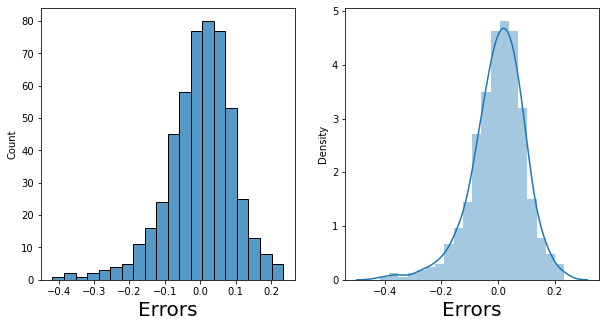

In [593]:
residuals = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot((residuals), bins = 20)
plt.xlabel('Errors', fontsize = 20)
plt.subplot(1,2,2)
sns.distplot((residuals), bins = 20)
plt.xlabel('Errors', fontsize = 20)
plt.show()

- When validating the residuals looks like , it is normally distributed.

## There is a linear relationship between X and Y

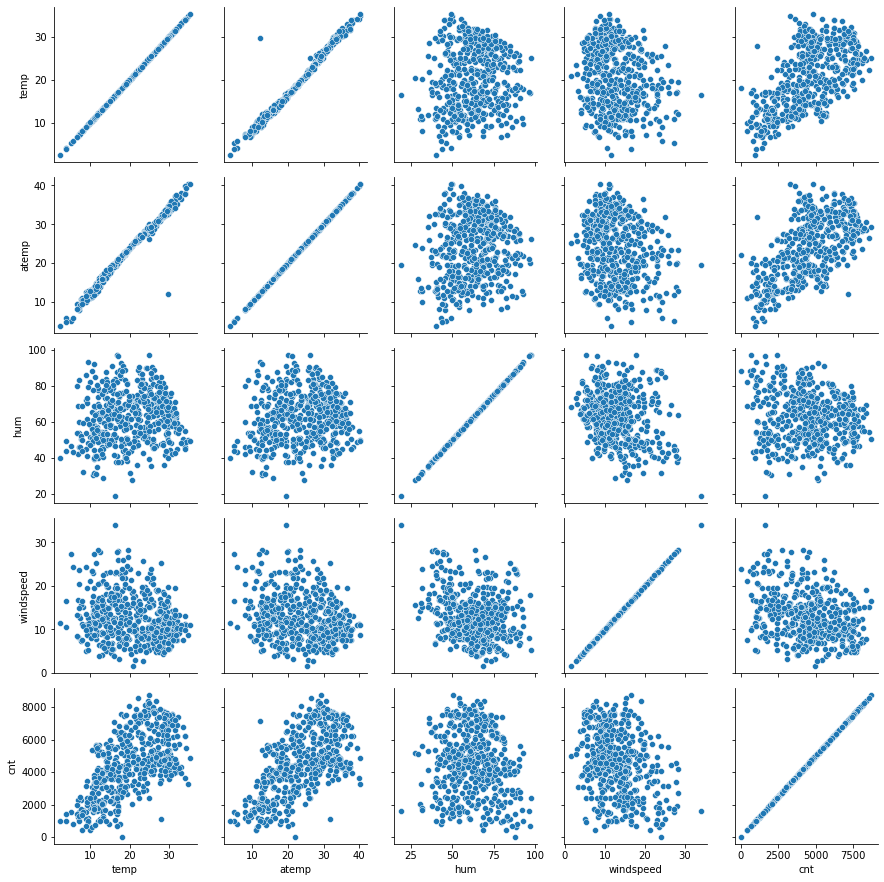

In [594]:
bike_numerical=bike_n[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

g = sns.PairGrid(bike_numerical)
g.map(sns.scatterplot)
plt.show()



It is observed that temp and atemp has the linear relationship with the variable cnt

**From the VIF , it is observed that there is no multicollinearity**

## Prediction on the Final Model

In [595]:
# using scaler to normalize the values

numerical = ['temp', 'atemp', 'hum', 'windspeed','cnt']

X_test[numerical] = scaler.transform(X_test[numerical])

In [596]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
256,0,0,1,0.765327,0.754750,0.648964,0.298736,0.547975,0,1,...,0,0,0,0,1,0,0,0,0,0
254,0,0,1,0.729210,0.720624,0.642707,0.137137,0.539692,0,1,...,0,0,1,0,0,0,0,0,0,0
249,0,0,1,0.672912,0.640854,0.929368,0.153852,0.227105,0,1,...,0,0,0,0,1,0,0,0,0,1
508,1,0,1,0.742483,0.726920,0.673925,0.310273,0.776346,1,0,...,0,0,0,0,0,1,0,0,0,0
109,0,0,1,0.667720,0.668632,0.543282,0.452579,0.451220,1,0,...,0,0,0,0,1,0,0,0,0,0


In [597]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.511416,0.013699,0.698630,0.532638,0.534406,0.570238,0.337573,0.506715,0.214612,0.278539,...,0.091324,0.086758,0.155251,0.114155,0.150685,0.164384,0.127854,0.146119,0.315068,0.041096
std,0.501015,0.116503,0.459904,0.238459,0.234352,0.193463,0.152768,0.224066,0.411493,0.449307,...,0.288730,0.282125,0.362974,0.318728,0.358561,0.371472,0.334692,0.354034,0.465607,0.198967
min,0.000000,0.000000,0.000000,0.060271,0.055477,-0.239512,0.047450,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332325,0.335935,0.424057,0.230151,0.349804,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.552460,0.563381,0.555496,0.324359,0.510354,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.727787,0.703710,0.425641,0.678613,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.983385,1.049574,0.970791,0.864144,0.951680,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Preparing X_test and y_test

In [598]:
y_test = X_test.pop('cnt')
X_test = X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 256 to 461
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [599]:
# Choosing the final variables derived in the train set
trained_columns=x_train_n.columns
X_test=X_test[trained_columns]

# using the stats model

X_test_lr7 = sm.add_constant(X_test)
X_test_lr7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 256 to 461
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [600]:
# predicting the model

y_pred = lr7.predict(X_test_lr7)

## EVALUATING THE MODEL

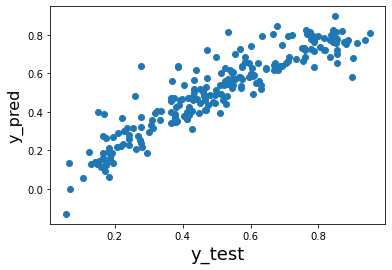

In [601]:
# plotting using the scatter plot for the understanding of the data

fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### Getting the R-squared value

In [602]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.830866476810124

### Getting the adjusted R-squared value

In [603]:
# adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

adjusted_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

## Interpretation of the Results obtained in the X Train data and X Test data

## correlating the R-squared values of the both the data sets:

- R-squared value of the train data is : 0.819
- Adjusted R-squared value of the train data is : 0.815
- R-squared value of the test data is : 0.8308
- Adjusted R-squared value of the test data is : 0.8227